In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Dataset/glass.data', sep = ',', header=None)

In [ ]:
df

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute) \
    -- 1 building_windows_float_processed \
    -- 2 building_windows_non_float_processed \
    -- 3 vehicle_windows_float_processed \
    -- 4 vehicle_windows_non_float_processed (none in this database) \
    -- 5 containers \
    -- 6 tableware \ 
    -- 7 headlamps 


In [ ]:
df.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop(columns = ['class','Type_Letter'], inplace = True)

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [ ]:
df.drop(columns=['ID'], inplace = True)

In [ ]:
df

In [ ]:
X = df.drop(columns='Type')
y = df['Type']

In [ ]:
y

In [ ]:
X.shape

In [ ]:
# standarizing the data
X_nomralize = X - np.mean(X, axis=0)

In [ ]:
X_nomralize

In [ ]:
# calculating covariance
cov_mat = np.cov(X_nomralize.T)

In [ ]:
# calculating eigenvalue and eigenvector of the cov matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

In [ ]:
# sorting eigen value and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
sorted_eigenvalues

array([3.00200916e+00, 1.65917340e+00, 6.79576475e-01, 6.43165731e-01,
       2.08456647e-01, 1.01165308e-01, 8.99856075e-03, 1.47744252e-03,
       9.70300837e-07])

In [ ]:
# proportion of variance
prop_of_variance = sorted_eigenvalues/np.sum(sorted_eigenvalues)
prop_of_variance*100

array([4.76205247e+01, 2.63192760e+01, 1.07800432e+01, 1.02024637e+01,
       3.30672372e+00, 1.60477360e+00, 1.42743130e-01, 2.34365001e-02,
       1.53917702e-05])

In [ ]:
final_data = np.dot(X_nomralize, eigenvectors[:, :5])

In [ ]:
final_data

array([[ 1.43142469, -1.10211499, -1.0669584 ,  0.15823696,  0.14308027],
       [ 1.43670679,  0.34358527, -0.2778236 ,  0.29393676, -0.19443421],
       [ 1.42732181,  0.3457201 ,  0.13870761,  0.32198409,  0.0237198 ],
       ...,
       [-1.77887835,  2.73133297,  0.02832228,  0.51502563,  0.79733072],
       [-1.79589397,  2.71516839,  0.14846808,  0.66090378,  0.69437156],
       [-1.90451734,  2.57907549,  0.05709431,  0.42630635,  0.88271462]])

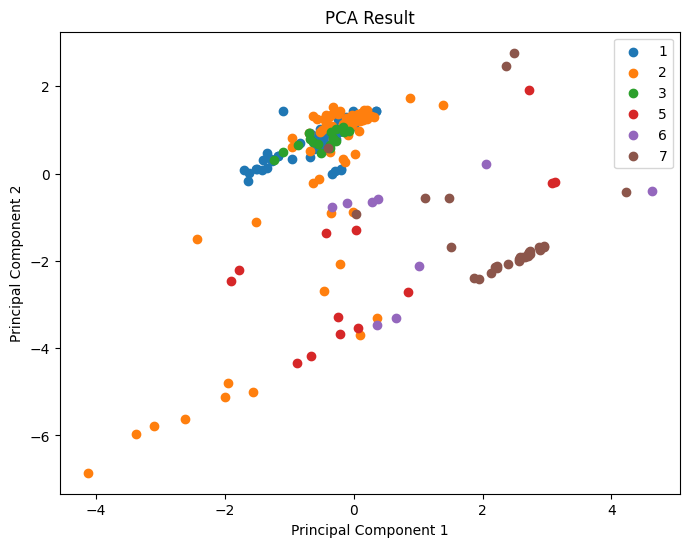

In [ ]:
labels = y
plt.figure(figsize=(8, 6))
if labels is not None:
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(final_data[labels == label, 1], final_data[labels == label, 0], label=label)
    plt.legend()
else:
    plt.scatter(final_data[:, 0], final_data[:, 1])
    plt.axis('equal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


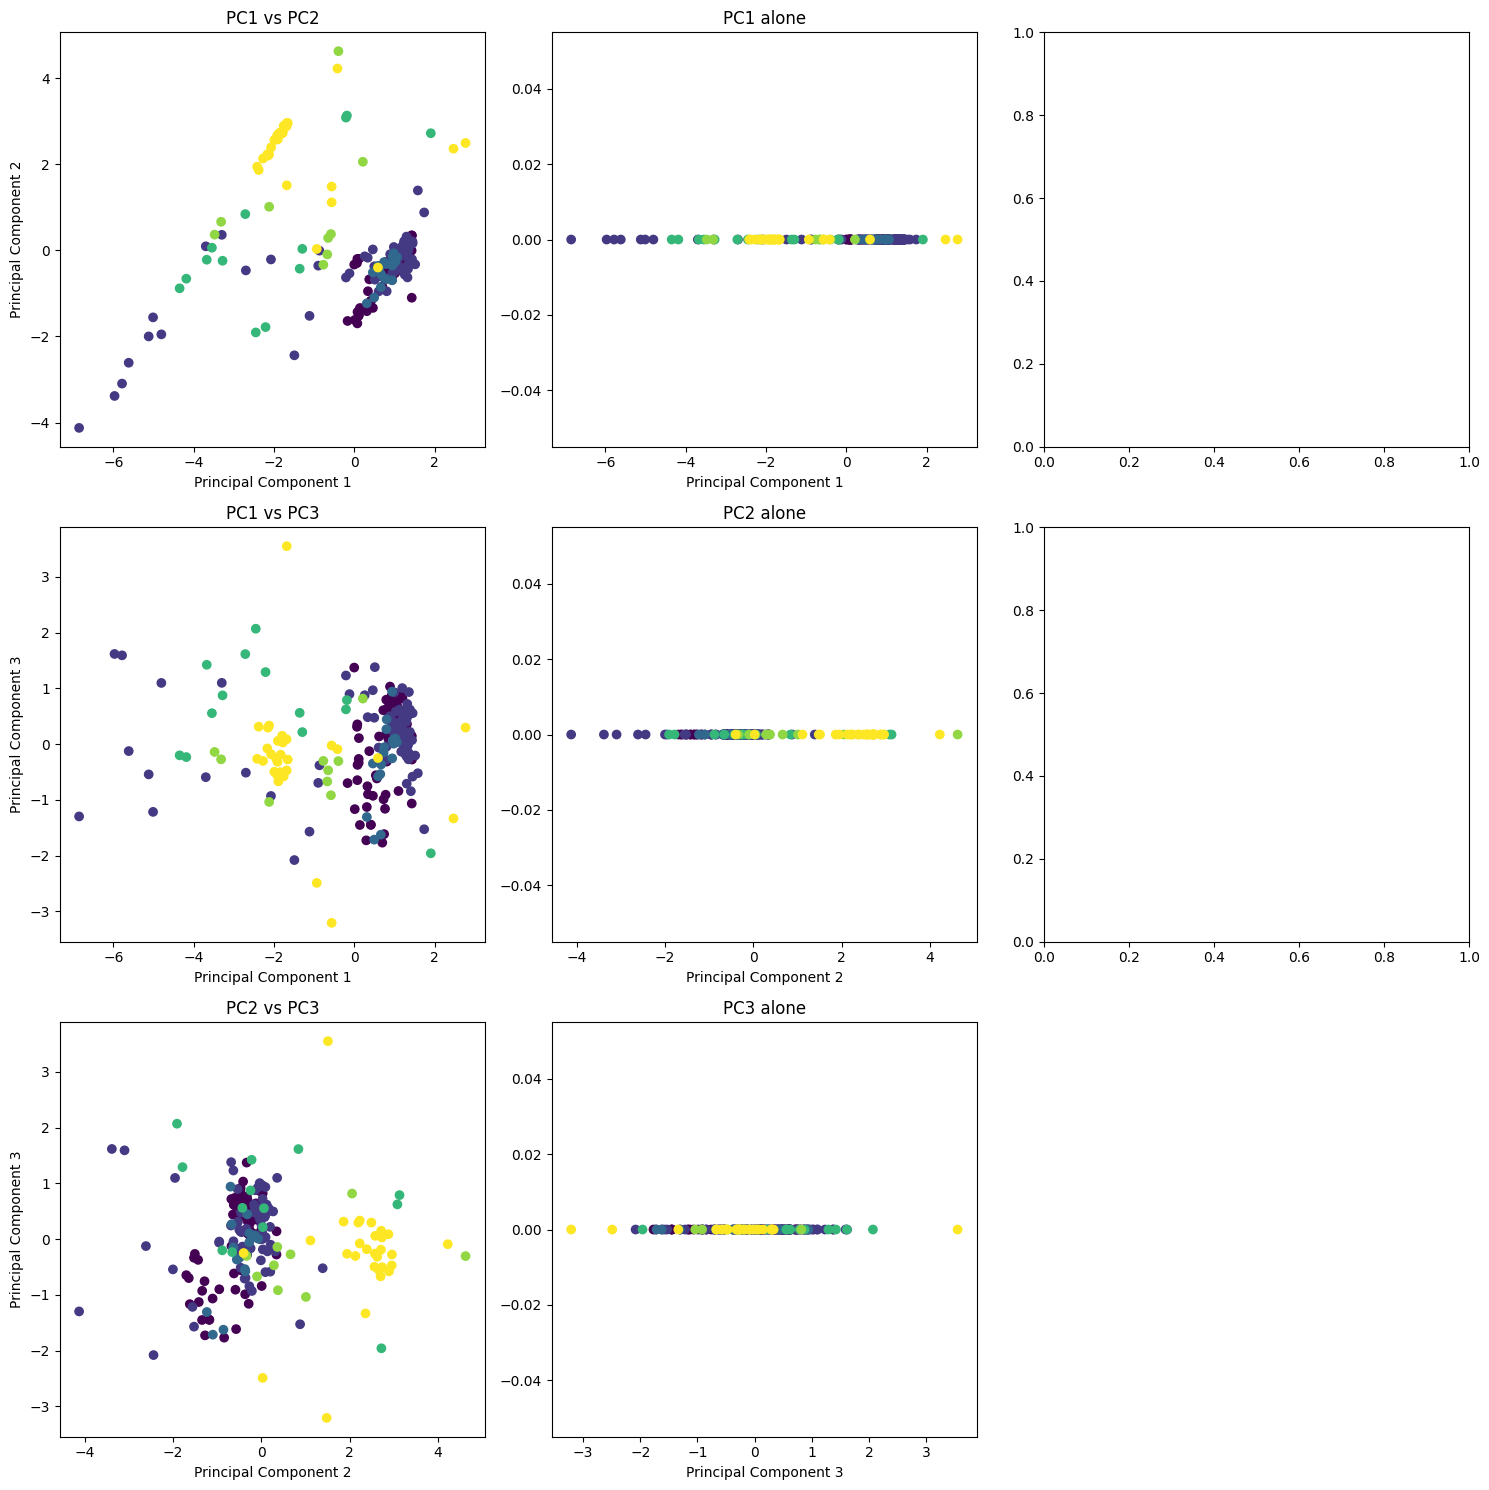

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

components = [(0, 1), (0, 2), (1, 2)]

for i in range(3):
    axs[i, 0].scatter(final_data[:, components[i][0]], final_data[:, components[i][1]], c=labels, cmap='viridis')
    axs[i, 0].set_xlabel(f'Principal Component {components[i][0] + 1}')
    axs[i, 0].set_ylabel(f'Principal Component {components[i][1] + 1}')
    axs[i, 0].set_title(f'PC{components[i][0] + 1} vs PC{components[i][1] + 1}')

for i in range(3):
    axs[i, 1].scatter(final_data[:, i], np.zeros_like(final_data[:, i]), c=labels, cmap='viridis')
    axs[i, 1].set_xlabel(f'Principal Component {i + 1}')
    axs[i, 1].set_title(f'PC{i + 1} alone')

fig.delaxes(axs[2, 2])  # Remove the empty subplot in the grid

plt.tight_layout()
plt.show()

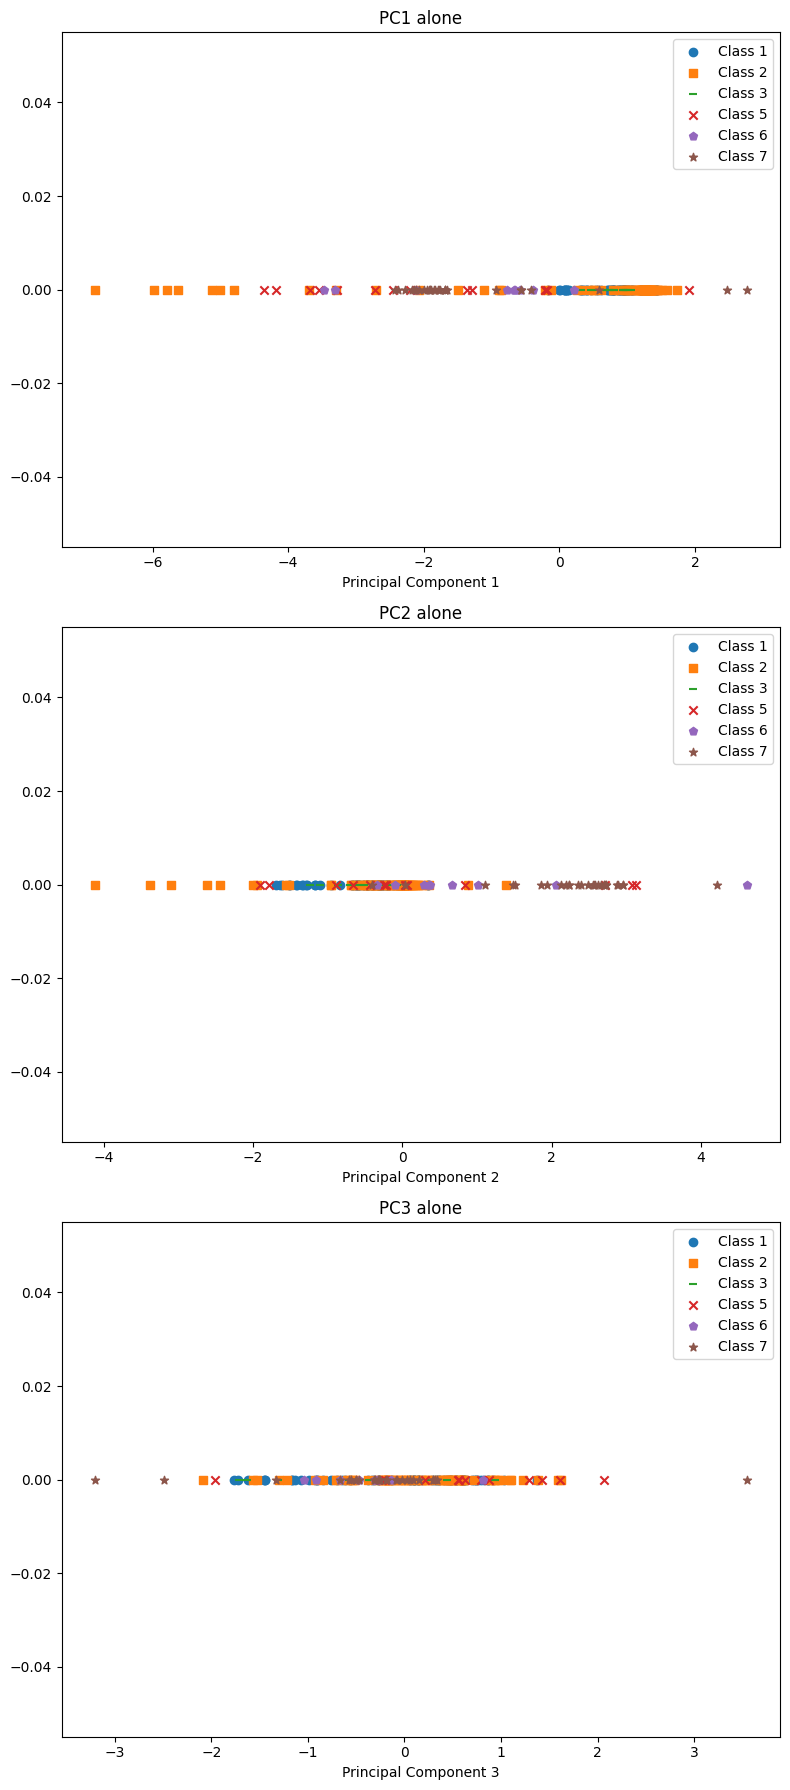

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

markers = ['o', 's', '_', 'x', 'p', '*']  # Markers for different classes
unique_labels = np.unique(labels)

for i in range(3):
    for label, marker in zip(unique_labels, markers):
        axs[i].scatter(final_data[labels == label, i], np.zeros_like(final_data[labels == label, i]), marker=marker, label=f'Class {label}')
    axs[i].set_xlabel(f'Principal Component {i + 1}')
    axs[i].set_title(f'PC{i + 1} alone')
    axs[i].legend()

plt.tight_layout()
plt.show()

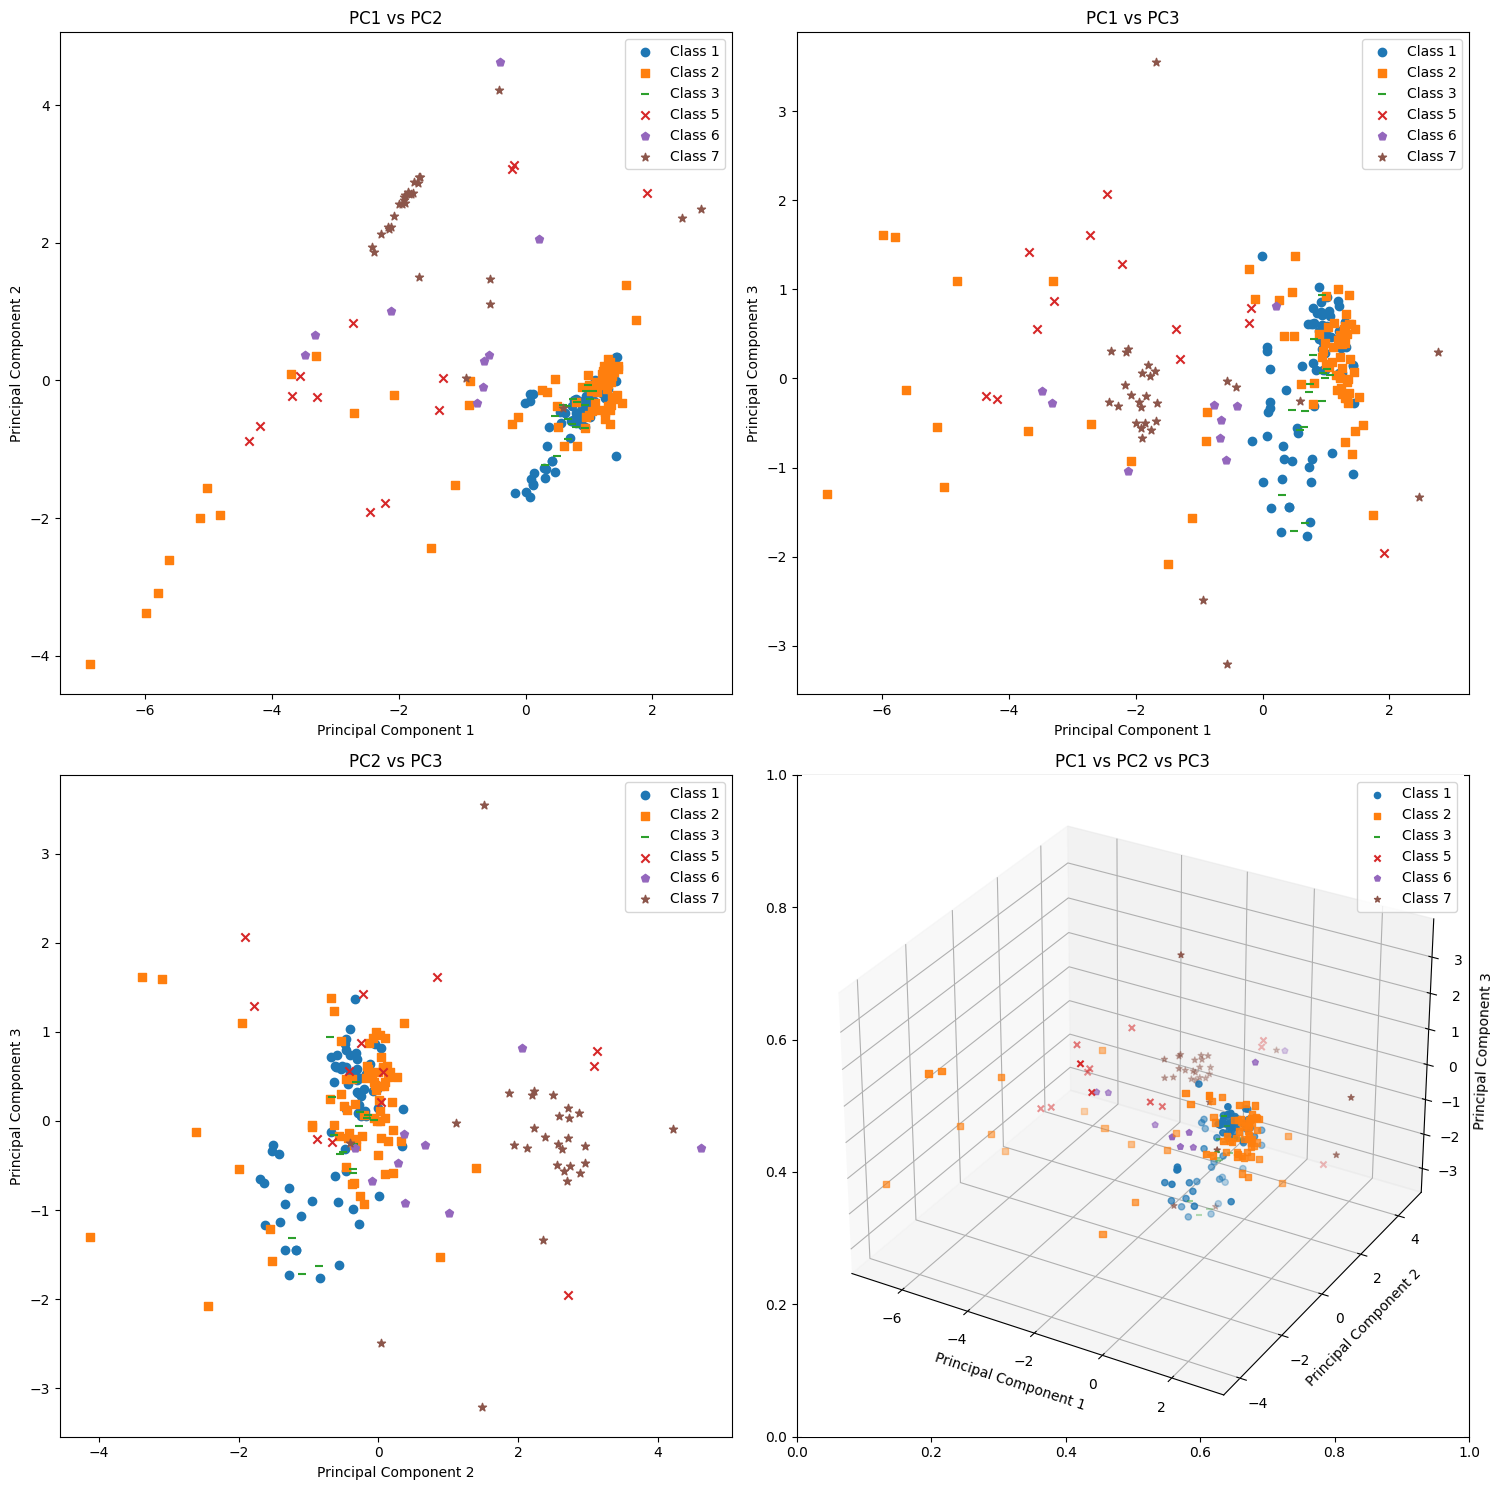

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

markers = ['o', 's', '_', 'x', 'p', '*']  # Markers for different classes
unique_labels = np.unique(labels)

# PCA 1 vs PCA 2
for label, marker in zip(unique_labels, markers):
    axs[0, 0].scatter(final_data[labels == label, 0], final_data[labels == label, 1], marker=marker, label=f'Class {label}')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')
axs[0, 0].set_title('PC1 vs PC2')
axs[0, 0].legend()

# PCA 1 vs PCA 3
for label, marker in zip(unique_labels, markers):
    axs[0, 1].scatter(final_data[labels == label, 0], final_data[labels == label, 2], marker=marker, label=f'Class {label}')
axs[0, 1].set_xlabel('Principal Component 1')
axs[0, 1].set_ylabel('Principal Component 3')
axs[0, 1].set_title('PC1 vs PC3')
axs[0, 1].legend()

# PCA 2 vs PCA 3
for label, marker in zip(unique_labels, markers):
    axs[1, 0].scatter(final_data[labels == label, 1], final_data[labels == label, 2], marker=marker, label=f'Class {label}')
axs[1, 0].set_xlabel('Principal Component 2')
axs[1, 0].set_ylabel('Principal Component 3')
axs[1, 0].set_title('PC2 vs PC3')
axs[1, 0].legend()

# 3D plot for PCA 1 vs PCA 2 vs PCA 3
ax_3d = fig.add_subplot(2, 2, 4, projection='3d')
for label, marker in zip(unique_labels, markers):
    ax_3d.scatter(final_data[labels == label, 0], final_data[labels == label, 1], final_data[labels == label, 2], marker=marker, label=f'Class {label}')
ax_3d.set_xlabel('Principal Component 1')
ax_3d.set_ylabel('Principal Component 2')
ax_3d.set_zlabel('Principal Component 3')
ax_3d.set_title('PC1 vs PC2 vs PC3')
ax_3d.legend()

plt.tight_layout()
plt.savefig('pca_combinations.png')
plt.show()

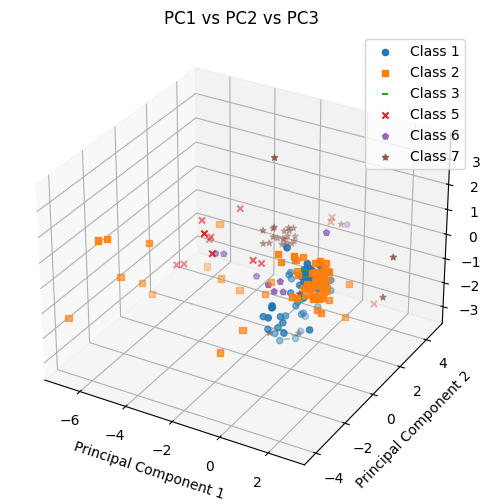

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

markers = ['o', 's', '_', 'x', 'p', '*']  # Markers for different classes
unique_labels = np.unique(labels)

for label, marker in zip(unique_labels, markers):
    ax.scatter(final_data[labels == label, 0], final_data[labels == label, 1], final_data[labels == label, 2], marker=marker, label=f'Class {label}')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PC1 vs PC2 vs PC3')
ax.legend()

plt.savefig('3D.png')
plt.show()

In [ ]:
def plot_pca_component(X_pca, labels, component_index, filename):
    fig, ax = plt.subplots(figsize=(8, 6))

    markers = ['o', 's', '_', 'x', 'p', '*']  # Markers for different classes
    unique_labels = np.unique(labels)

    for label, marker in zip(unique_labels, markers):
        ax.scatter(X_pca[labels == label, component_index], np.zeros_like(X_pca[labels == label, component_index]), marker=marker, label=f'Class {label}')
    ax.set_xlabel(f'Principal Component {component_index + 1}')
    ax.set_title(f'PC{component_index + 1} alone')
    ax.legend()

    plt.savefig(filename)
    plt.show()

In [ ]:
def plot_pca_combination(X_pca, labels, component_indices, filename):
    fig, ax = plt.subplots(figsize=(8, 6))

    markers = ['o', 's', '_', 'x', 'p', '*']  # Markers for different classes
    unique_labels = np.unique(labels)

    for label, marker in zip(unique_labels, markers):
        ax.scatter(X_pca[labels == label, component_indices[0]], X_pca[labels == label, component_indices[1]], marker=marker, label=f'Class {label}')
    ax.set_xlabel(f'Principal Component {component_indices[0] + 1}')
    ax.set_ylabel(f'Principal Component {component_indices[1] + 1}')
    ax.set_title(f'PC{component_indices[0] + 1} vs PC{component_indices[1] + 1}')
    ax.legend()

    plt.savefig(filename)
    plt.show()

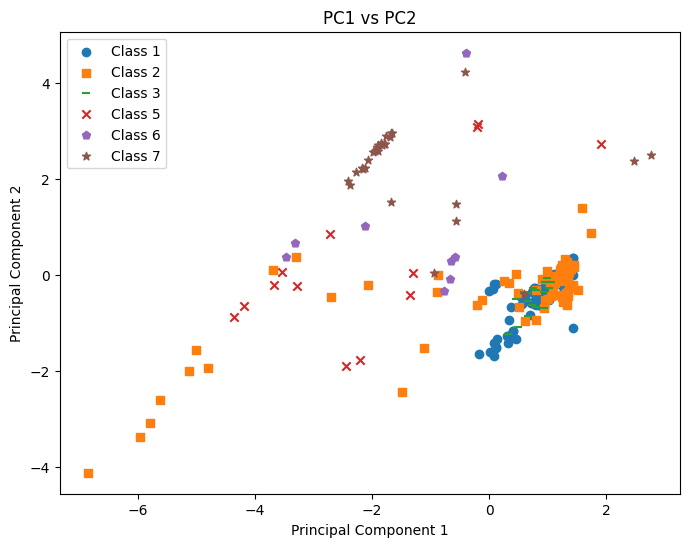

In [ ]:
plot_pca_combination(final_data, y, (0, 1), 'pca_1_vs_2.png')

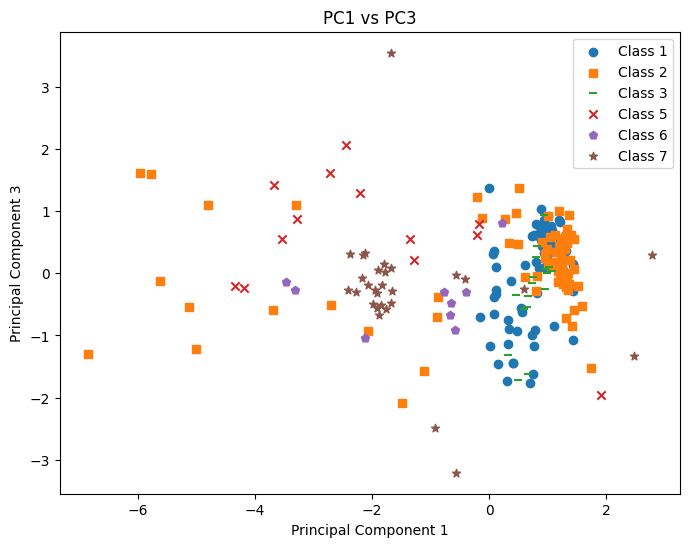

In [ ]:
plot_pca_combination(final_data, y, (0, 2), 'pca_1_vs_3.png')

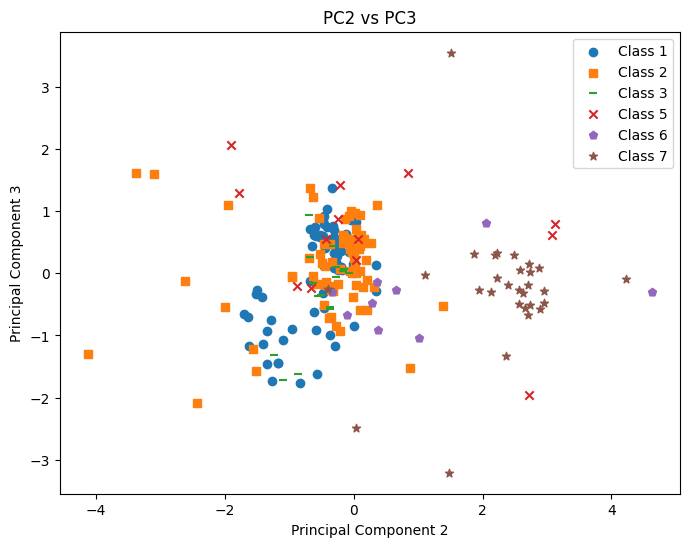

In [ ]:
plot_pca_combination(final_data, y, (1, 2), 'pca_2_vs_3.png')

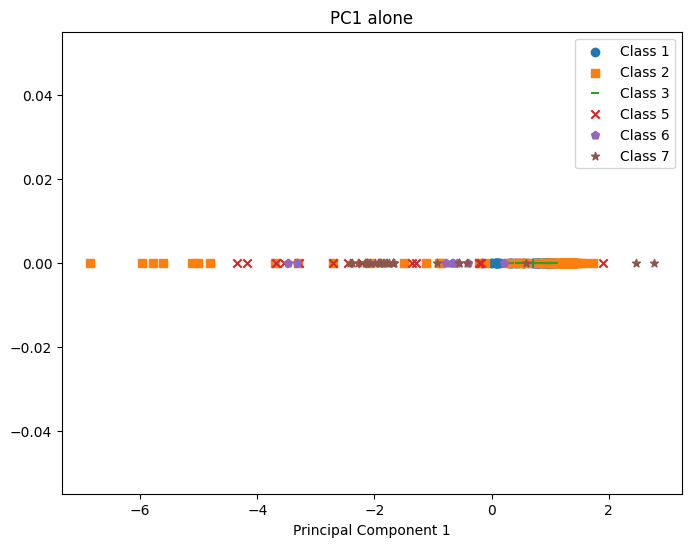

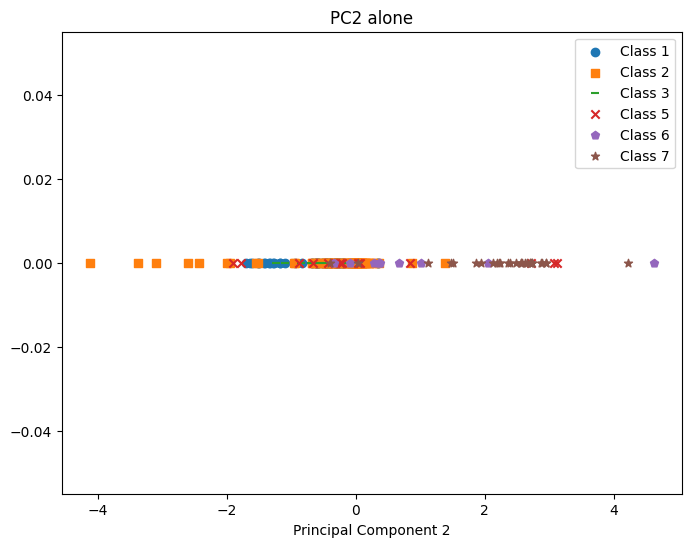

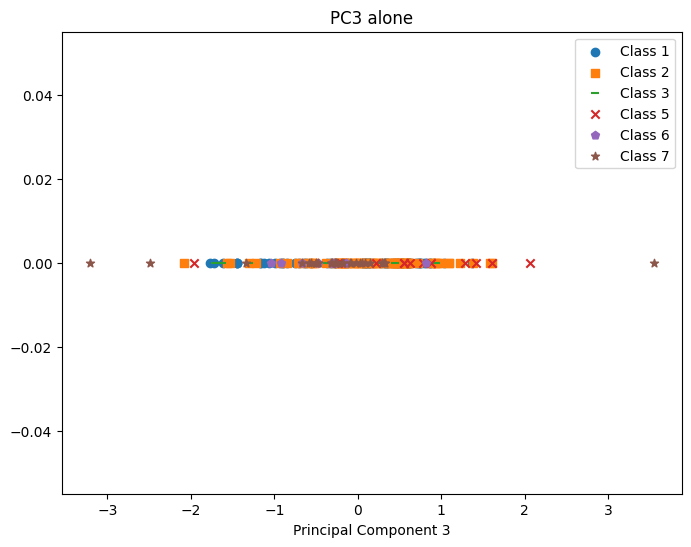

In [ ]:
for i in range(3):
    plot_pca_component(final_data, y, i, f'pca_component_{i+1}.png')

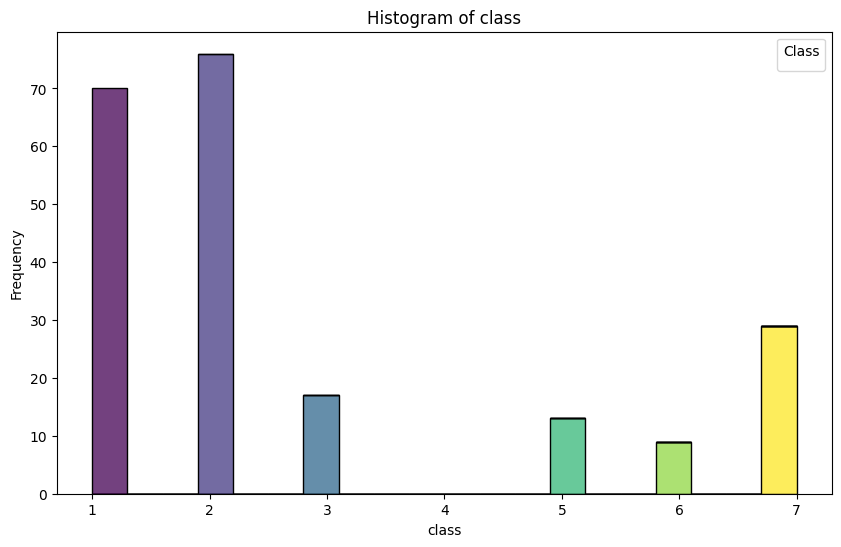

In [ ]:
feature_names = df.columns
df['class'] = y
df.drop(columns = 'class')
for feature in feature_names:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='class', multiple='stack', palette='viridis', bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Class')
    plt.savefig(f'{feature}_histogram.png')
    plt.show()

In [ ]:
type_mapping = {1: 'WF', 2: 'WNF', 3: 'VWF', 4: 'VWNF', 5: 'C', 6: 'T', 7: 'H'}
df['Type_Letter'] = df['Type'].map(type_mapping)

In [ ]:
df['Type_Letter'].value_counts()

Type_Letter
WNF    76
WF     70
H      29
VWF    17
C      13
T       9
Name: count, dtype: int64

In [ ]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

<ipython-input-61-8fece75554e4>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Type_Letter'], kde=False, palette='viridis', shrink=0.8, discrete = True)


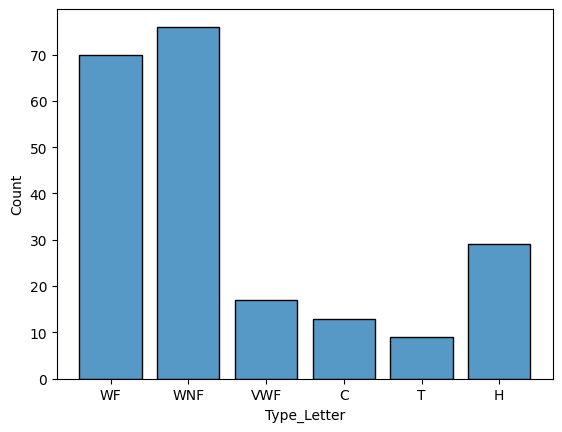

In [ ]:
sns.histplot(df['Type_Letter'], kde=False, palette='viridis', shrink=0.8, discrete = True)
plt.savefig('histogram of class distribution.png')

# Show the plot
plt.show()

<ipython-input-62-b39d125804e2>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Type'], kde=False, palette='viridis', shrink=0.8, discrete = True)


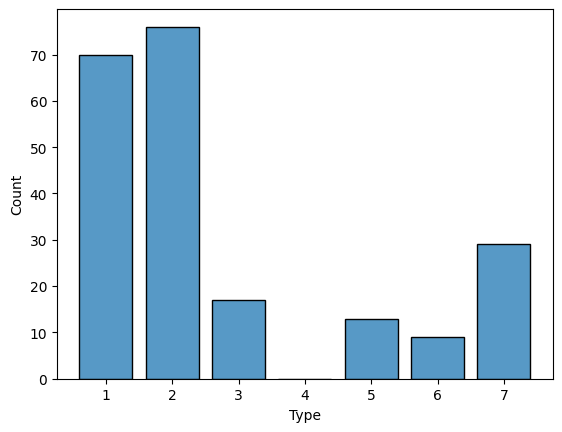

In [ ]:
sns.histplot(df['Type'], kde=False, palette='viridis', shrink=0.8, discrete = True)
plt.savefig('histogram of class by Type.png')

# Show the plot
plt.show()

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type', 'class',
       'Type_Letter'],
      dtype='object')

In [ ]:
final_data.shape

(214, 5)

In [ ]:
X.shape

(214, 9)

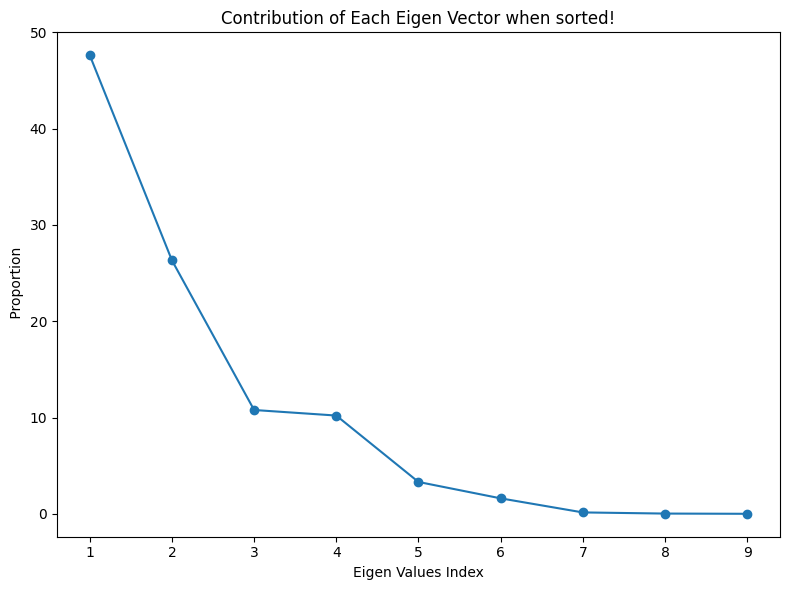

In [ ]:
x = range(1, len(prop_of_variance) + 1)

# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(x, prop_of_variance*100, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Eigen Values Index')
plt.ylabel(' Proportion')
plt.title('Contribution of Each Eigen Vector when sorted!')

# Show plot
# plt.grid(True)
plt.tight_layout()
plt.savefig("Proportion of variance.png")
plt.show()